# Stroke Predicton
## Sohail Ahmed 3/14/2023
### email ahmedsohailkhan14@gmail.com

# About Dataset
##### According to the World Health Organization(WHO) stroke is the 2nd largest leading cause of death globaly responsible for approximately 11% of total deaths. This dataset is used to predict wheather a patient is likely to get stroke based on the input parameters like age, gender,etc. Each row in the data provides relavant information about the patient.

In [45]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
# from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS** 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report

In [2]:
# Import dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploring Data

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.stroke.unique()

array([1, 0], dtype=int64)

In [8]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df.stroke.value_counts(True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [10]:
df.stroke.value_counts(True).rename('%').mul(100)

0    95.127202
1     4.872798
Name: %, dtype: float64

Text(0.5, 1.0, 'Numaber of Patient')

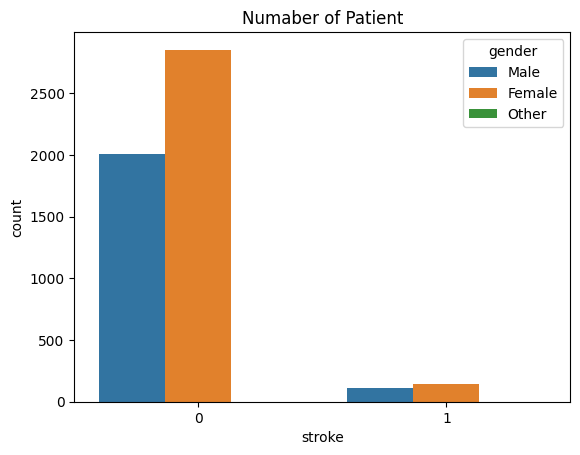

In [11]:
# Show no of patient by stroke3
sns.countplot(df, x='stroke',hue='gender')
plt.title("Numaber of Patient")

Text(0.5, 1.0, 'Numaber of Patient')

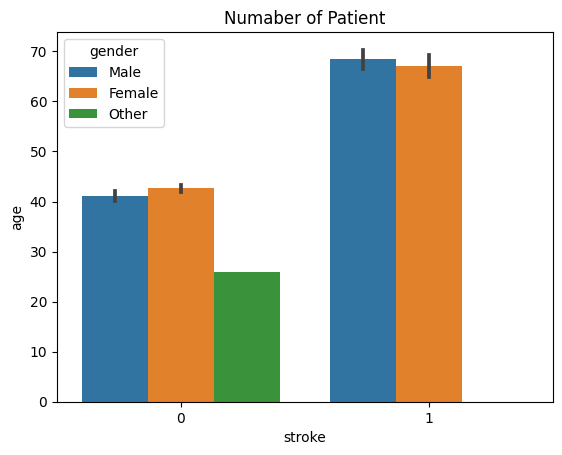

In [12]:
sns.barplot(df, x='stroke', y= 'age', hue='gender')
plt.title("Numaber of Patient")

# Finding Missing Values

In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# Percentage of missing values
df.isnull().sum()/df.count()*100

id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64

# Seprate Categorical & Numarical Columns

In [15]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != "O"]
numerical_columns

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [16]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes == "O"]
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Checking Duplicate Values
#### There is no duplicate

In [17]:
df.duplicated().sum()

0

In [19]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [22]:
df['age'].nunique()

104

In [23]:
df['age'].sample(10)

4824    81.0
4899    65.0
2673    81.0
930     80.0
385     37.0
2917    18.0
335     11.0
5048    40.0
2953    53.0
4036    59.0
Name: age, dtype: float64

In [24]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [25]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

C:\Users\Sohail\AppData\Local\Temp\ipykernel_9124\3452672913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


[Text(0.5, 1.0, 'Correlation Matrix')]

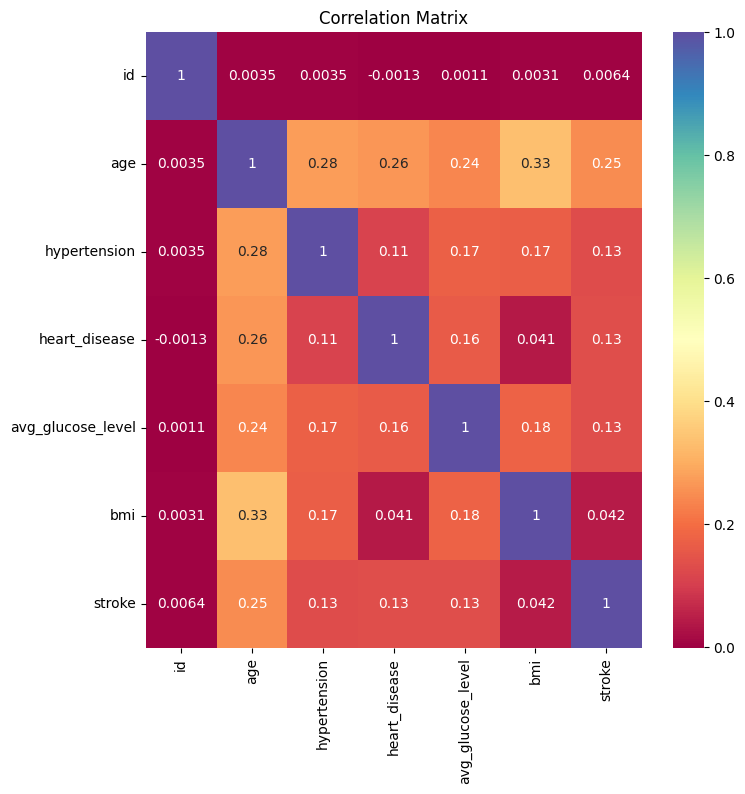

In [26]:
# Correlation matrix
corr = df.corr() 
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

#####Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [27]:
corr_matrix = df.corr().round(2)
corr_matrix

C:\Users\Sohail\AppData\Local\Temp\ipykernel_9124\556824720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(2)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


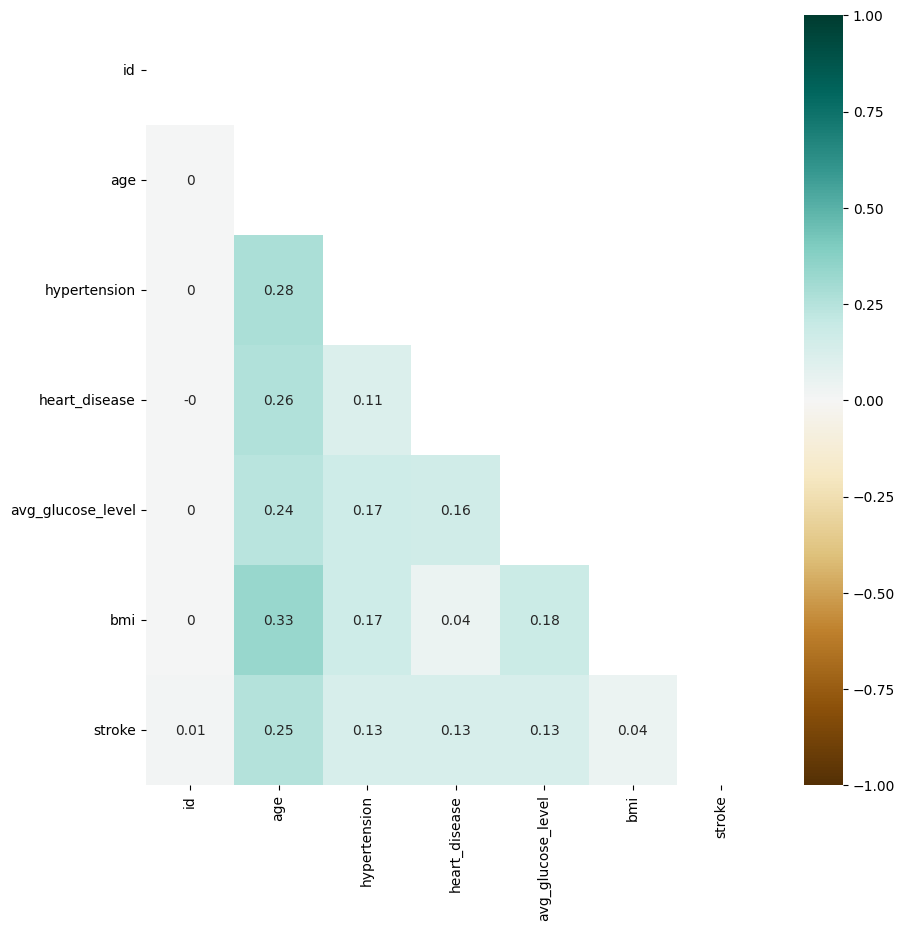

In [28]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

#Handling Missing Values

In [29]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [31]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

dropping irrelevant feature "id"

In [32]:
train  = df.drop(['id'],axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Converting categorical features into numerical

In [34]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [35]:
train_data_cat.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [36]:
train_data_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


In [37]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [38]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1


In [39]:
y = data['stroke']
x = data.drop('stroke', axis = 1)

In [40]:
print(x.shape)
print(y.shape)

(5110, 21)
(5110,)


# scailing the data"

In [47]:
sc = StandardScaler()
x = sc.fit_transform(x)

### Splitting data into Training and Testing

In [48]:
x

array([[-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00,  2.70637544e+00,  1.00123401e+00],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01,  2.12155854e+00,  4.39307442e-16],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -5.11442636e-01,  2.21736316e-01],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
        -2.38946800e-01,  1.32825706e+00, -4.27845098e-01],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -4.60867458e-01, -3.49895329e-01]])

In [50]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

### Building Classifiers
 
### Logistic Regression

In [72]:
accuracy = {}

In [74]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(svc)]=accuracy_score(y_test, y_pred1)*100

0.9471624266144814


# Confusion Matrix

<AxesSubplot: >

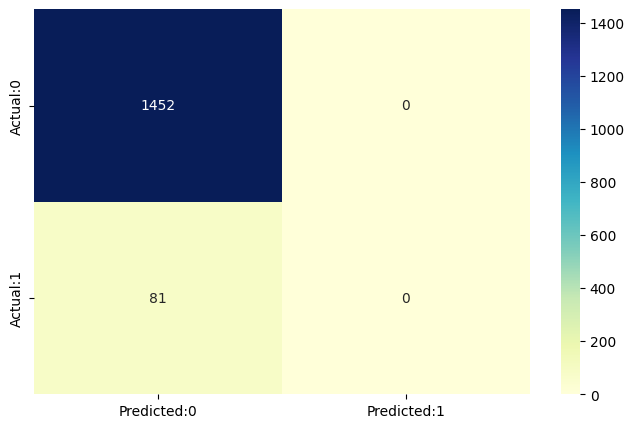

In [55]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Classification Report

In [56]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



c:\Users\Sohail\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sohail\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sohail\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Predicting

In [57]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [58]:
test.sample(10)

,Actual,Y test predicted
2805,0,0
194,1,0
2775,0,0
2265,0,0
3421,0,0
37,1,0
1193,0,0
4364,0,0
1108,0,0
814,0,0


# DecisionTreeClassifier

In [75]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(svc)]=accuracy_score(y_test, y_pred2)*100

0.9465101108936725


<AxesSubplot: >

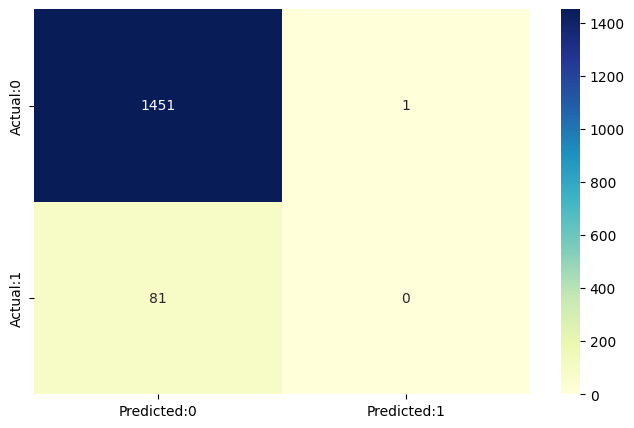

In [61]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [62]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [63]:
y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [64]:
test.head(5)

,Actual,Y test predicted
2804,0,0
4866,0,0
2467,0,0
4773,0,0
3061,0,0


In [76]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(svc)]=accuracy_score(y_test, y_pred3)*100

0.9471624266144814


<AxesSubplot: >

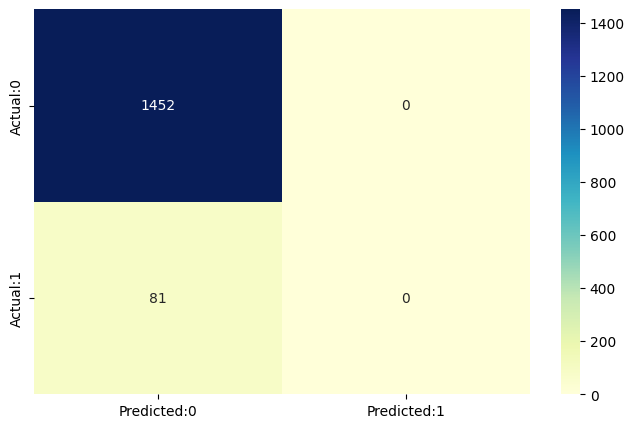

In [66]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [77]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(svc)]=accuracy_score(y_test, y_pred4)*100

0.9425962165688193


<AxesSubplot: >

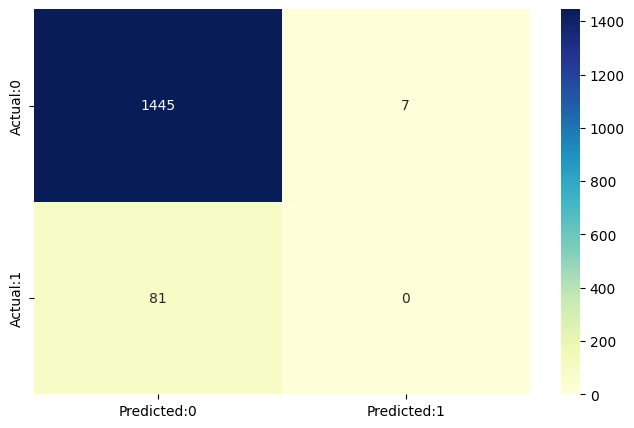

In [68]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM

In [78]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)]=accuracy_score(y_test, y_pred5)*100

0.9471624266144814


<AxesSubplot: >

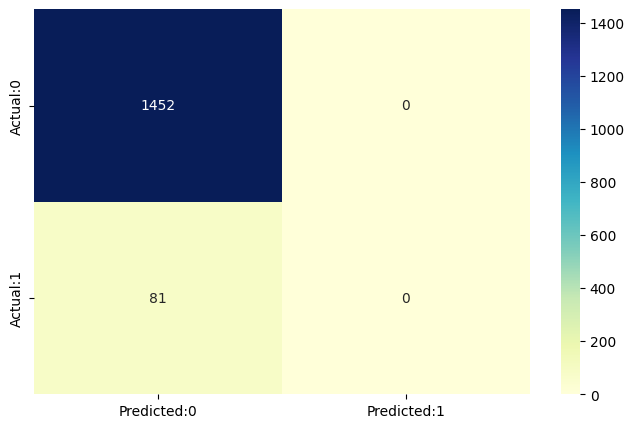

In [70]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [79]:
accuracy

{'SVC()': 94.71624266144813}

# Conclusion
Almost all heart disease people are above 50, which is obvious.
Hypertesion disease in people of above 50.
The most important features are "age", "bmi" and "glucose_level".
Only 249 of the total dataset is positive for stroke(4.8%)
This happens when we have very less(<5%) diagnosed positive for stroke i.e unbalanced target variable.
We can use SMOTE(Synthetic Minority Oversampling Technique) to increase(oversample) the target varaible. It works by duplicating examples in the minority class.